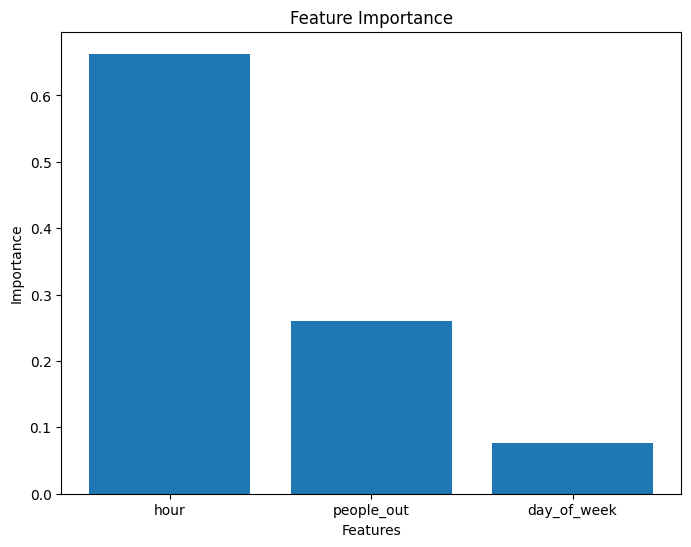

MSE: 157301.34
MAE: 243.44
R² Score: 0.96


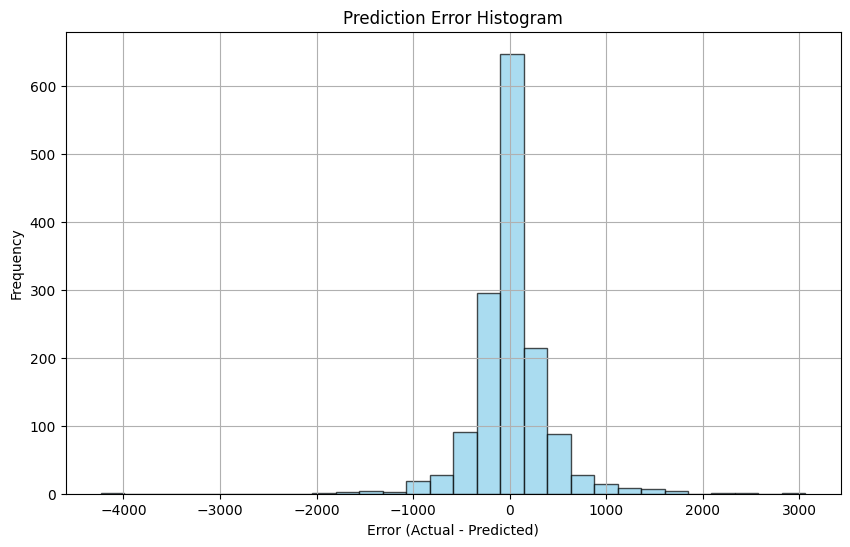

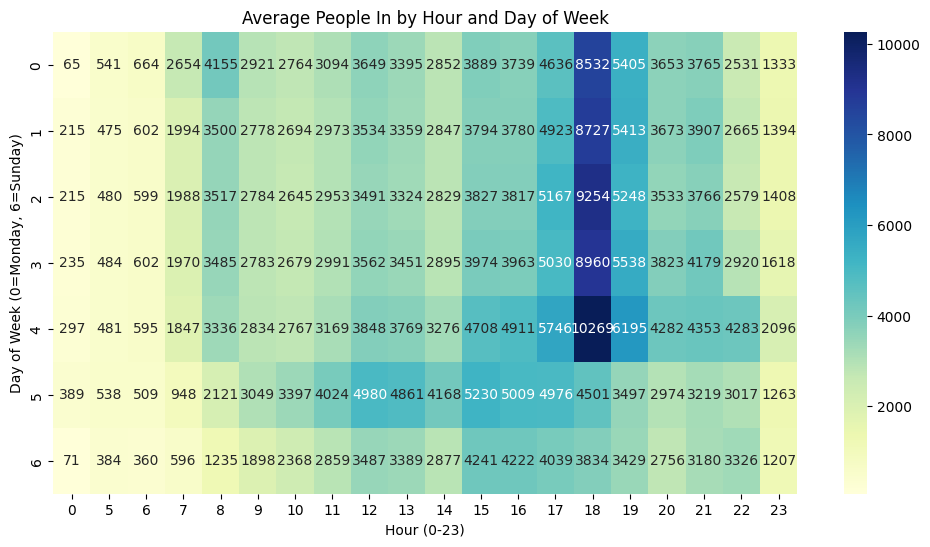

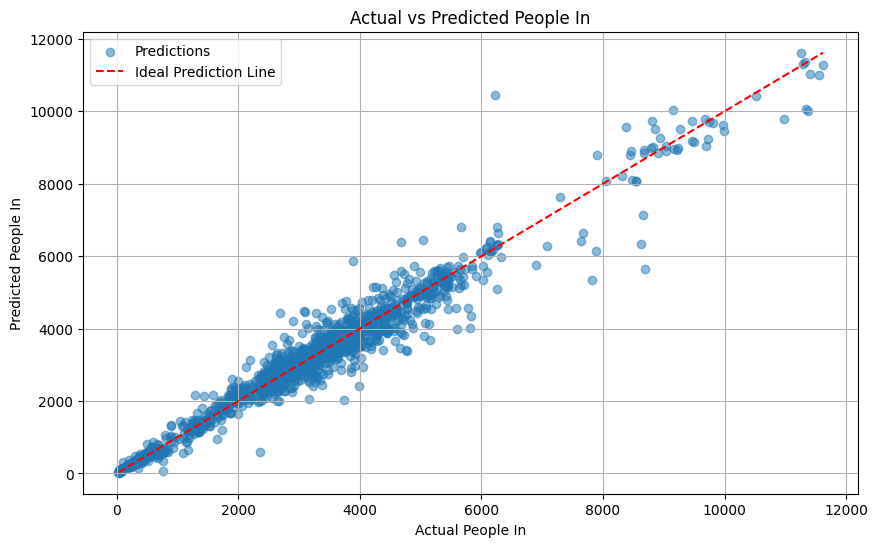

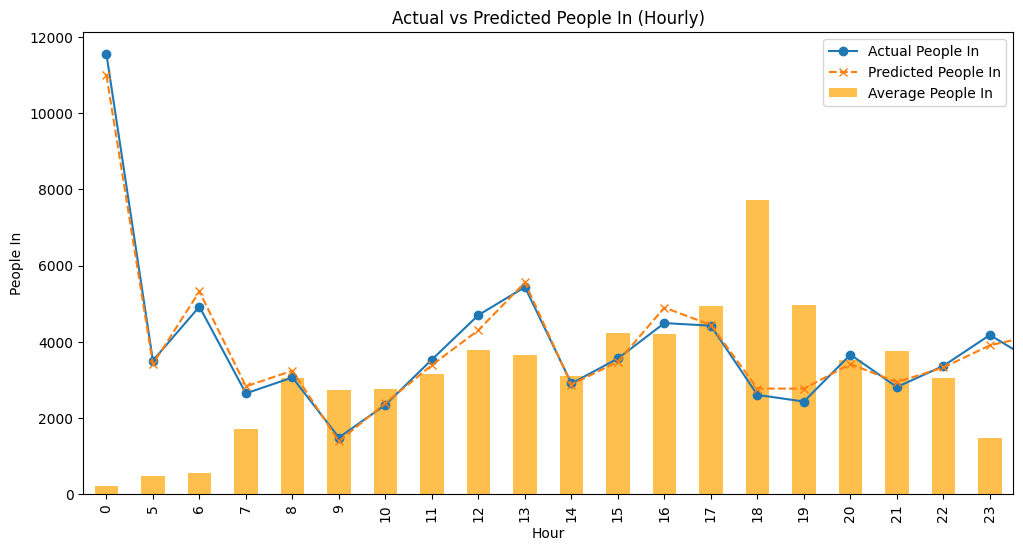

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 전처리
# Load data
metro_data = pd.read_csv("dataset/metro.csv")

# Convert timestamp to datetime and extract features
metro_data['timestamp'] = pd.to_datetime(metro_data['timestamp'])
metro_data['hour'] = metro_data['timestamp'].dt.hour
metro_data['day_of_week'] = metro_data['timestamp'].dt.dayofweek

# Drop rows with missing values
metro_data = metro_data.dropna()



# Filter data for a specific station
station_code = 150  # Example station
filtered_data = metro_data[metro_data['station_code'] == station_code]

# Define features and target
features = ['hour', 'day_of_week', 'people_out']
target = 'people_in'
X = filtered_data[features]
y = filtered_data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 특성 중요도 계산
# Train Random Forest for feature importance analysis
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# 3. 모델 학습
# Use the same Random Forest model for predictions
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 4. 학습한 모델 기반 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(y_test - y_pred, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Prediction Error Histogram')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 5. 히트맵 생성
heatmap_data = filtered_data.groupby(['day_of_week', 'hour'])['people_in'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", cbar=True)
plt.title('Average People In by Hour and Day of Week')
plt.xlabel('Hour (0-23)')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.show()

# 6. 예측 값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction Line')
plt.title('승하차 실제값 vs 예측값')
plt.xlabel('실제 승차 인원')
plt.ylabel('예측 승차 인원')
plt.legend()
plt.grid(True)
plt.show()

# 7. 모델 예측값 기반 시간대별 시각화
hourly_mean = filtered_data.groupby('hour')['people_in'].mean()
plt.figure(figsize=(12, 6))
hourly_mean.plot(kind='bar', color='orange', alpha=0.7, label='Average People In')
plt.plot(y_test.values[:24], label='Actual People In', linestyle='-', marker='o')
plt.plot(y_pred[:24], label='Predicted People In', linestyle='--', marker='x')
plt.legend()
plt.title('Actual vs Predicted People In (Hourly)')
plt.xlabel('Hour')
plt.ylabel('People In')
plt.show()

In [11]:
metro_data.head()
features

['hour', 'day_of_week', 'people_out']